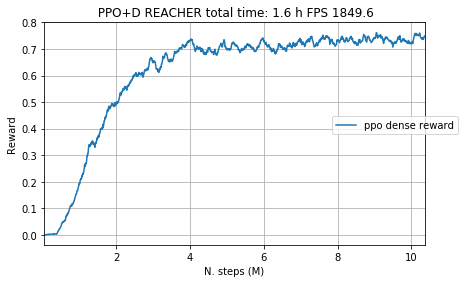

In [30]:
from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd





def get_data(my_dir):
    num_good_traj = 0
    
    exps = glob(my_dir+'*')
    d = exps[0]
    df = load_results(d)
    #df = pd.DataFrame() 

    df['f']= df['l'].cumsum()/1000000

    df['perf']= df['r']
    df['perf'].where(df['perf']>0,0,inplace=True)
    df['goal'] = df['perf']>0.9  #guess a threadshold

    return df


my_dir = '/workspace8/gabriele/RUNS/exp_lunar_ppobc_5'
df = get_data(my_dir)



time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))


roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(2, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format('PPO+D REACHER',total_time/3600, total_steps/total_time))
df[['f','reward_woD']].rolling(roll).mean().iloc[0:-1:40].plot('f','reward_woD',  ax=ax,label='ppo dense reward')

ax.set_xlabel('N. steps (M)')
ax.set_ylabel('Reward')
#plt.xlim((0, 20))
ax.grid(True)
#ax.legend(loc=4, prop={'size': 10})#
ax.legend(bbox_to_anchor=(1.1, 0.6))
